 <img src="global-terrorism-illustration-world-as-big-problem-49172576.jpg" style="width:1000px;height:500px">

# <centre><font color = green> "Monthly Internship program for Professional"

## <centre><font color= red>"The Coders Ready"

### <font color= blue>Data Science and Bussiness Analyst - Task 1</font>

#### Name - Netranjali Nitin Avhad 

#### Trainee Inter  at Coders Ready

#### Batch - Sept 2022

# <font color= green> Exploratory Data Analysis - Global Terrorism</font>

### Introduction

Terrorism is the biggest hurdle to world peace. Terrorism is commonly ignores by the civilians who are not affected directely by danges. Based on the location of events, people at large have very limited information of the world. The purpose of this project is to focus on Global Terrorism by analysing dataset and aslo where the occur, types of attacks, types of weapons, terrorist targets and so on.

## Importing Liabraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data set

In [77]:
data = pd.read_csv("C:/Users/Nikki/globalterrorism.csv", encoding='cp1252', low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

View The Shape

In [78]:
data.shape

(181691, 135)

### Data Cleaning

In [79]:
#Creating new dataframe containg columns(12-mentioned in 'About the dataset' section) which we are mainly going to use in this analysis among total 135 columns:
dict={
    'Year':data['iyear'],
    'Country':data['country_txt'],
    'Region':data['region_txt'],
    'State':data['provstate'],
    'City':data['city'],
    'Attack_type':data['attacktype1_txt'],
    'Target_type':data['targtype1_txt'],
    'Target_subtype':data['targsubtype1_txt'],
    'Gang_name':data['gname'],
    'Weapon_type':data['weaptype1_txt'],
    'Kill':data['nkill'],
    'Wound':data['nwound']
}
df=pd.DataFrame(dict)
df.head()

,Year,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Kill,Wound
0,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0,0.0
1,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0
2,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0
3,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,NaN,NaN
4,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,NaN,NaN


In [82]:
df.shape

(181691, 12)

Check for null values.


View unique column names.

In [15]:
df.isnull().sum()

Year                  0
Country               0
Region                0
State               421
City                434
Attack_type           0
Target_type           0
Target_subtype    10373
Gang_name             0
Weapon_type           0
Kill              10313
Wound             16311
dtype: int64

In [16]:
#Filling Null values in 'Target_subtype' column as 'others':
df['Target_subtype'] = df['Target_subtype'].fillna('others')

#Filling Null values in 'City' column as 'Unknown':
df['City']=df['City'].fillna('Unknown')

#Filling Null values in 'State' column as 'Unknown':
df['State']=df['State'].fillna('Unknown')

#Filling Null values in 'Kill' column as 0:
df['Kill']=df['Kill'].fillna(0)

#Filling Null values in 'Wound' column as 0:
df['Wound']=df['Wound'].fillna(0)

In [17]:
df.isnull().sum() 

Year              0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
Kill              0
Wound             0
dtype: int64

In [20]:
df.columns.values

array(['Year', 'Country', 'Region', 'State', 'City', 'Attack_type',
       'Target_type', 'Target_subtype', 'Gang_name', 'Weapon_type',
       'Kill', 'Wound'], dtype=object)

### Important cloumn Values

In [21]:
df.info

<bound method DataFrame.info of         Year             Country                       Region  \
0       1970  Dominican Republic  Central America & Caribbean   
1       1970              Mexico                North America   
2       1970         Philippines               Southeast Asia   
3       1970              Greece               Western Europe   
4       1970               Japan                    East Asia   
...      ...                 ...                          ...   
181686  2017             Somalia           Sub-Saharan Africa   
181687  2017               Syria   Middle East & North Africa   
181688  2017         Philippines               Southeast Asia   
181689  2017               India                   South Asia   
181690  2017         Philippines               Southeast Asia   

                  State           City                     Attack_type  \
0               Unknown  Santo Domingo                   Assassination   
1               Federal    Mexico city 

Rename some columns which we are going to use for analysis

In [22]:
#Creating new dataframe containg columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region',
                     'provstate':'State','city':'City','latitude':'latitude','longitude':'longitude','summary':'summary',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
                     'nwound':'Wound'},inplace=True)

View the statistical description of the dataset

In [26]:
df.describe()

,Year,Kill,Wound
count,181691.000000,181691.000000,181691.000000
mean,2002.638997,2.266860,2.883296
std,13.259430,11.227057,34.309747
min,1970.000000,0.000000,0.000000
25%,1991.000000,0.000000,0.000000
50%,2009.000000,0.000000,0.000000
75%,2014.000000,2.000000,2.000000
max,2017.000000,1570.000000,8191.000000


View top 10 countries

In [27]:
#Finding out how many countries data is given in this dataset:
df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

Top 10 affected countries.

In [28]:
df['Region'].value_counts().head(10)


Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

### Correlatin Between the Feartures

In [29]:
df.corr

<bound method DataFrame.corr of         Year             Country                       Region  \
0       1970  Dominican Republic  Central America & Caribbean   
1       1970              Mexico                North America   
2       1970         Philippines               Southeast Asia   
3       1970              Greece               Western Europe   
4       1970               Japan                    East Asia   
...      ...                 ...                          ...   
181686  2017             Somalia           Sub-Saharan Africa   
181687  2017               Syria   Middle East & North Africa   
181688  2017         Philippines               Southeast Asia   
181689  2017               India                   South Asia   
181690  2017         Philippines               Southeast Asia   

                  State           City                     Attack_type  \
0               Unknown  Santo Domingo                   Assassination   
1               Federal    Mexico city 

## Data Visualization

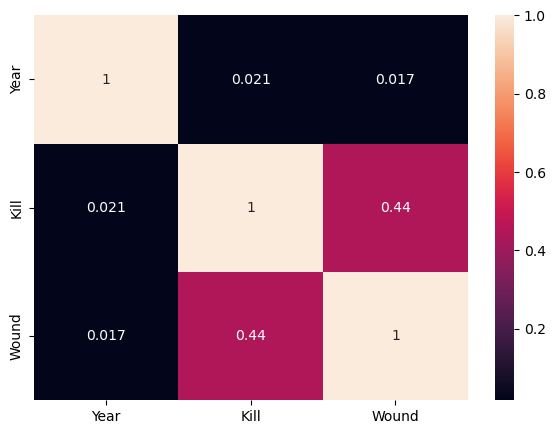

In [31]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot= True)
plt.show()

In [32]:
df.isnull().sum()


Year              0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
Kill              0
Wound             0
dtype: int64

### Analysis

In [33]:
print("Country with most attacks: ",df["Country"].value_counts().idxmax())

Country with most attacks:  Iraq


In [34]:
print("City with most attacks: ",df["City"].value_counts().index[1])

City with most attacks:  Baghdad


In [35]:
print("Region with most attacks: ",df["Region"].value_counts().idxmax())

Region with most attacks:  Middle East & North Africa


In [36]:
print("Year with most attacks: ",df["Year"].value_counts().idxmax())

Year with most attacks:  2014


In [38]:
print("Most Attack Types: ",df["Attack_type"].value_counts().idxmax())

Most Attack Types:  Bombing/Explosion


In [23]:
print("Group with most attacks: ",df["Group"].value_counts().index[1])

Group with most attacks:  Taliban


In [24]:
print("Month with most attacks: ",df["Month"].value_counts().idxmax())


Month with most attacks:  5


### Years Vs Attacks

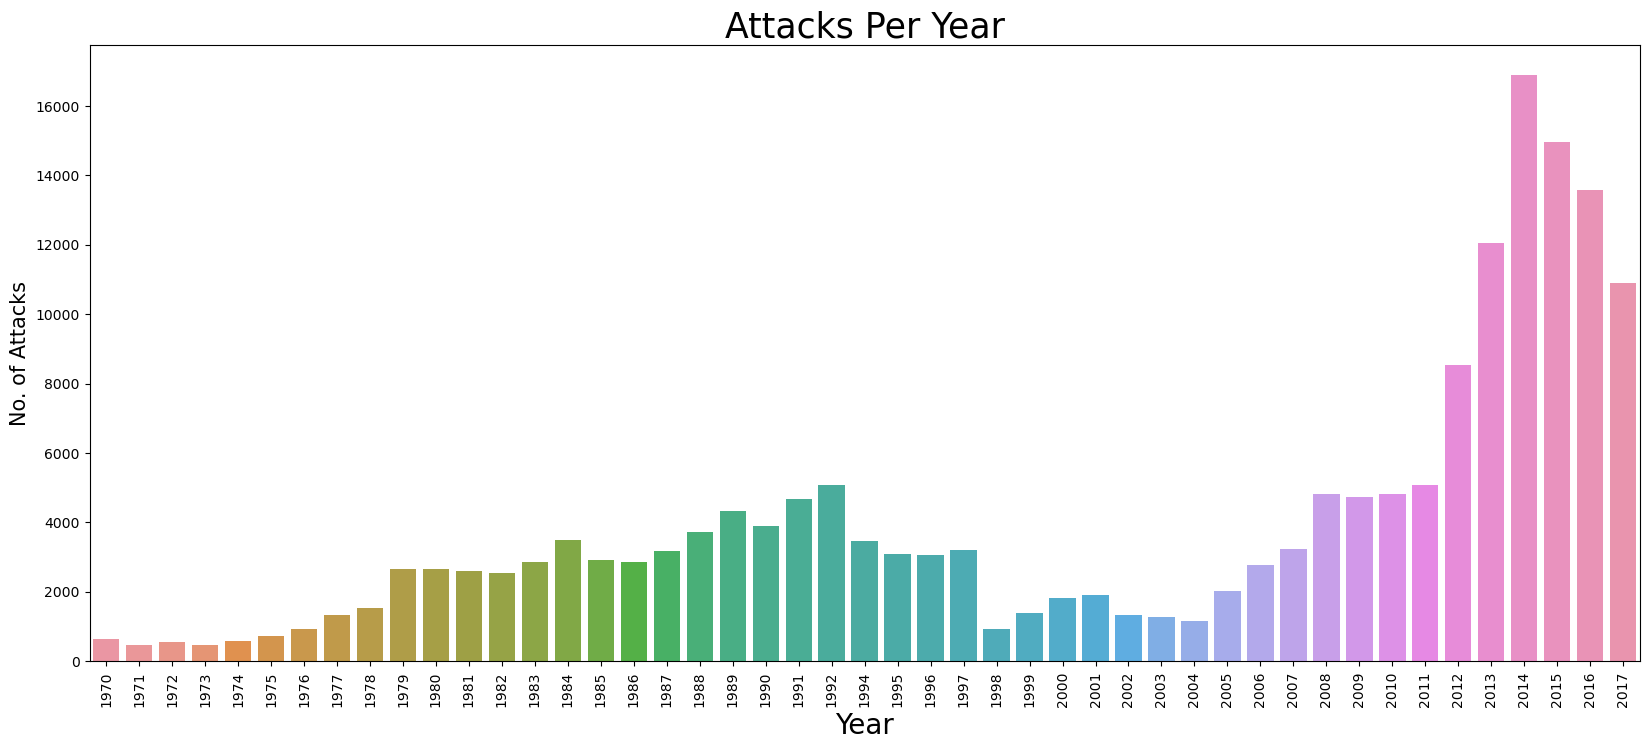

In [52]:
plt.figure(figsize=(20,8))
plt.title('Attacks Per Year',fontsize=25)
sns.countplot(x=df.Year);
plt.xticks(rotation=90);
plt.xlabel('Year',fontsize=20)
plt.ylabel('No. of Attacks',fontsize=15);

### Most affected Countries

Hot zones using visualizations for this we have to use matplotlib and seaborn which we have installed at the beginning.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


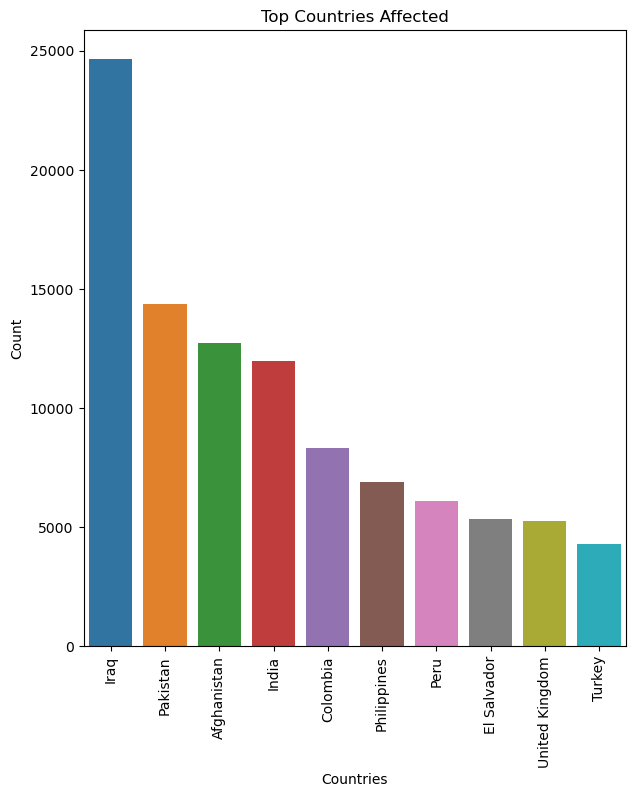

In [50]:
plt.subplots(figsize=(7,8))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show();

### Top affected Cities

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


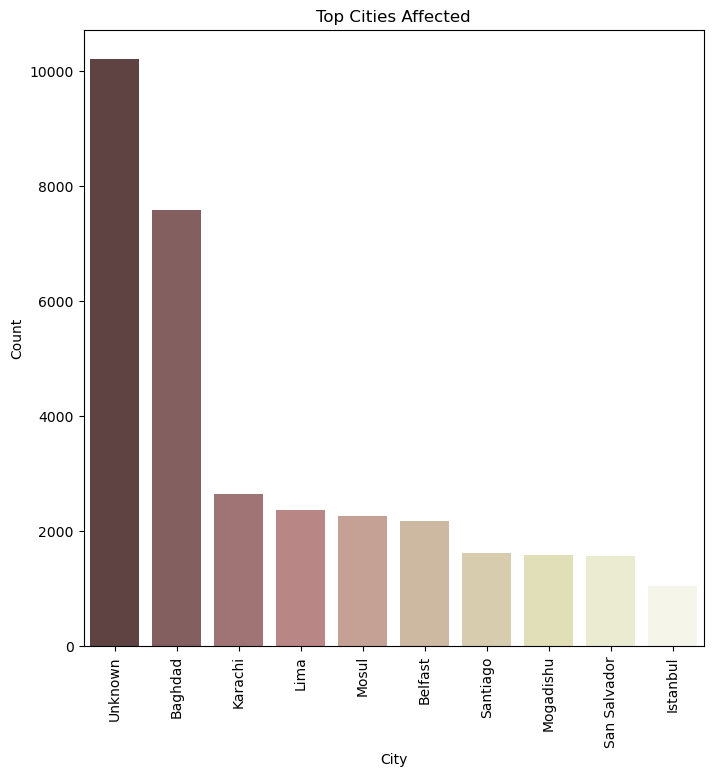

In [53]:
plt.subplots(figsize=(8,8))
sns.barplot(df['City'].value_counts()[:10].index,df['City'].value_counts()[:10].values,palette='pink')
plt.title('Top Cities Affected')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### Activity of each Year

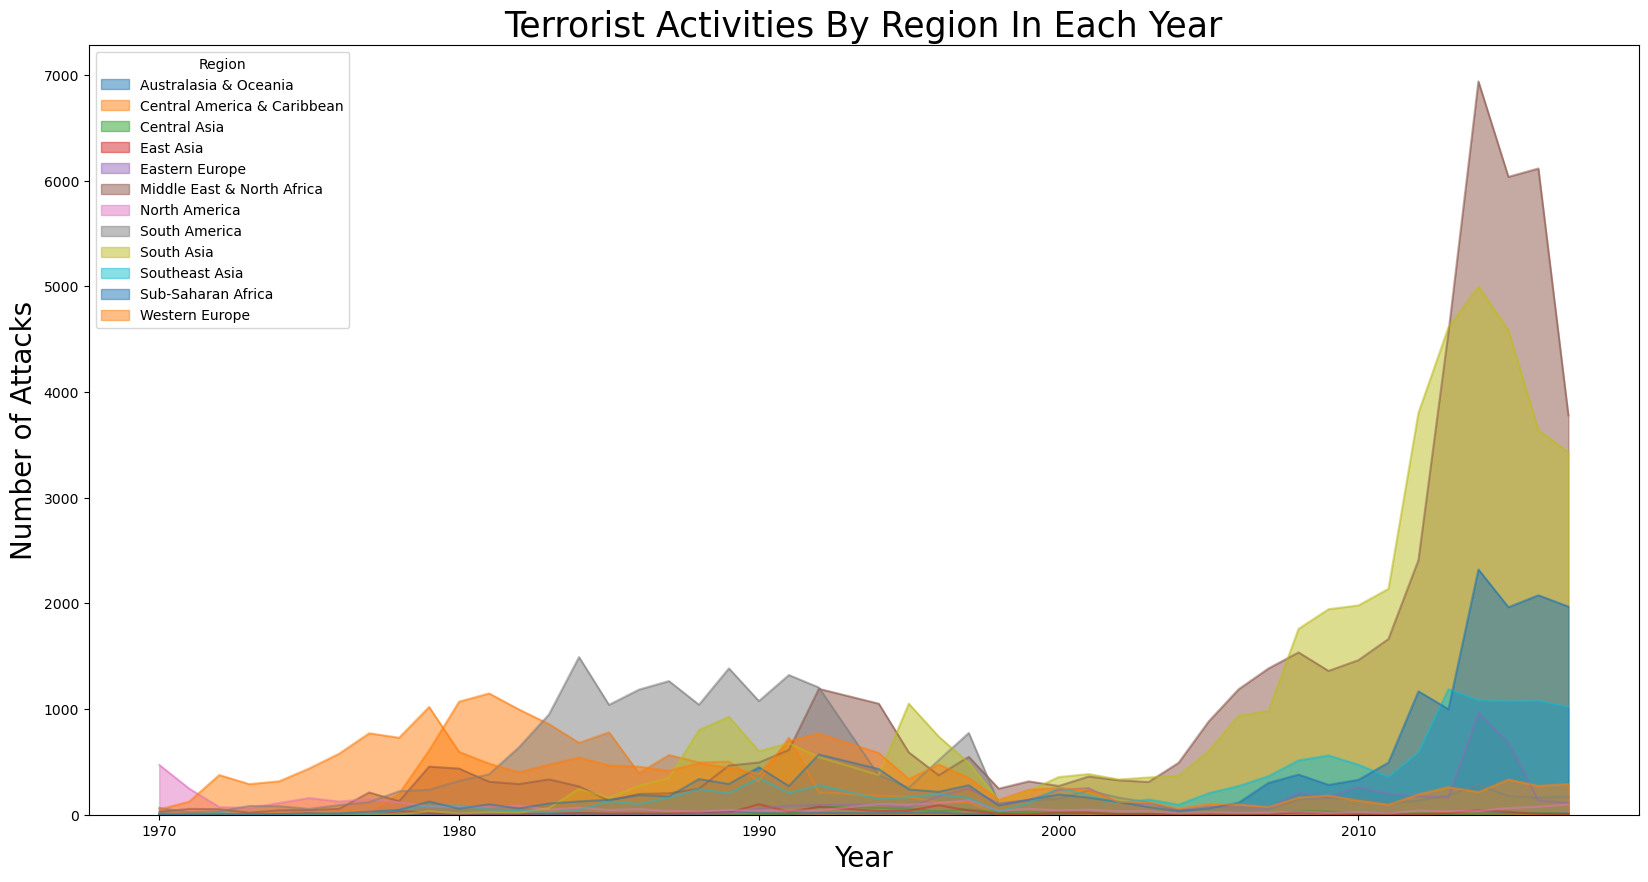

In [55]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

### Pie Plotting of attacks

- Most of the attacks were attacked through explosives and then through firearms. 
Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.

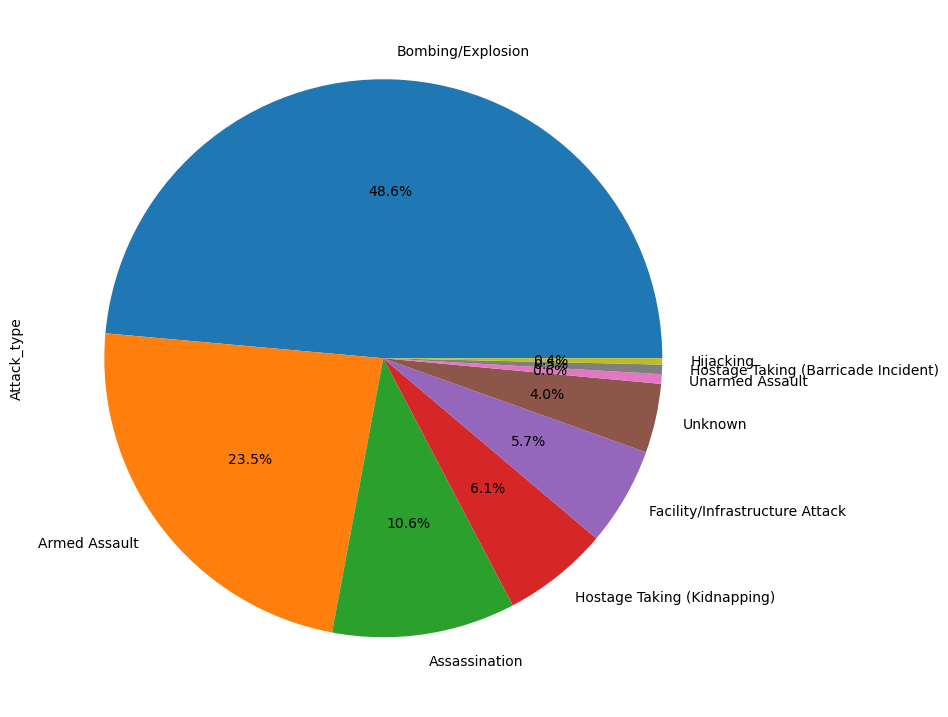

In [56]:
# Pie Plot of AttackTypes
plt.figure(figsize=(9,10))
df['Attack_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

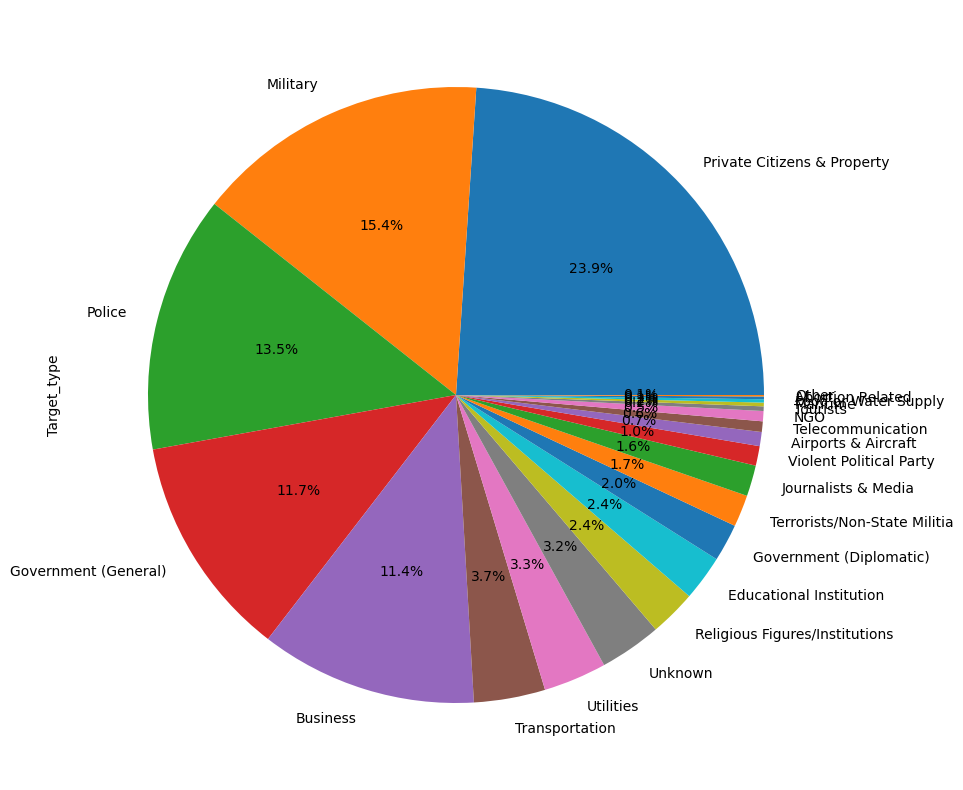

In [59]:
plt.figure(figsize=(15,10))
df['Target_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()


In [62]:
d = df[['Year','Kill']].groupby(['Year']).sum()
d.head()

,Kill
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


### Death in Years

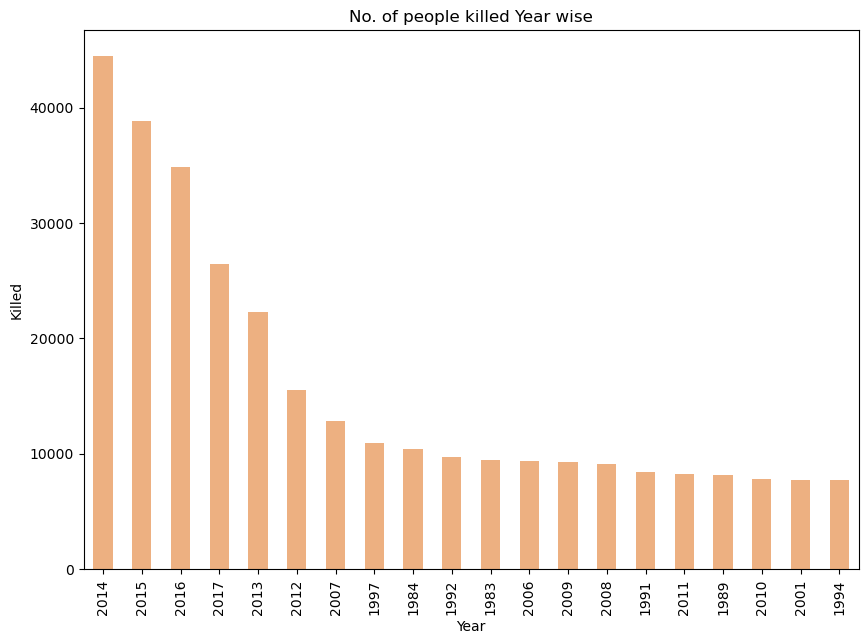

In [63]:
# Killed vs Year
plt.figure(figsize = (10,7))
df.groupby(['Year'])['Kill'].sum().sort_values(ascending = False).head(20).plot(kind = 'bar', colormap = 'flare')
plt.xticks(rotation=90)
plt.title('No. of people killed Year wise')
plt.ylabel("Killed")
plt.show()

### Injured

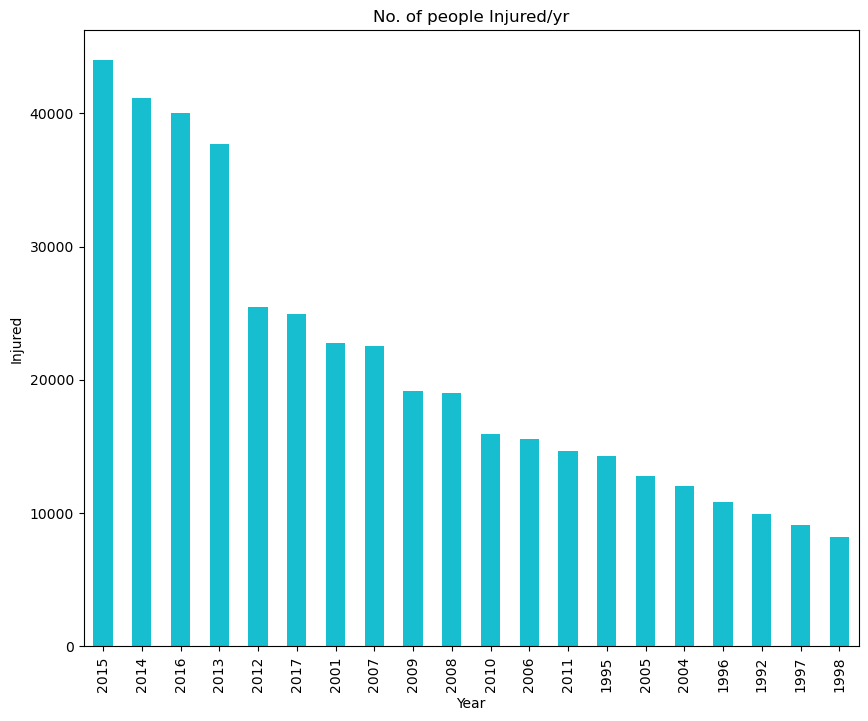

In [64]:
plt.figure(figsize = (10,8))
df.groupby(['Year'])['Wound'].sum().sort_values(ascending = False).head(20).plot(kind = 'bar', colormap = 'tab10_r')
plt.xticks(rotation=90)
plt.title('No. of people Injured/yr')
plt.ylabel("Injured")
plt.show()

### Killed VS Country

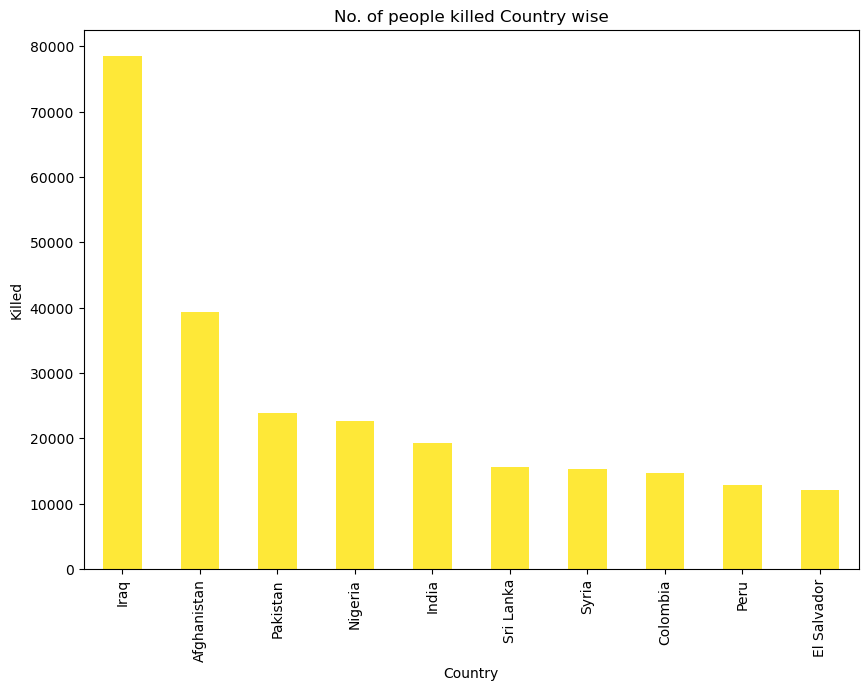

In [65]:
plt.figure(figsize = (10,7))
df.groupby(['Country'])['Kill'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', colormap = 'cividis_r')
plt.xticks(rotation=90)
plt.title('No. of people killed Country wise')
plt.ylabel("Killed")
plt.show()

### Killed VS Region

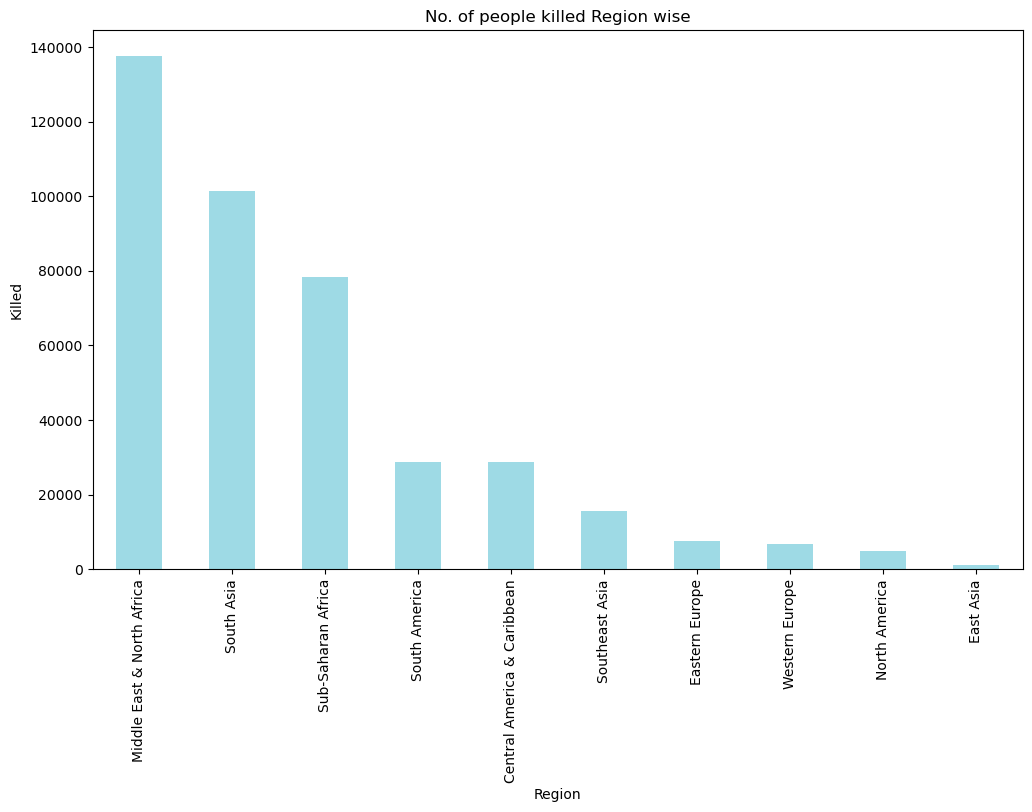

In [66]:
plt.figure(figsize = (12,7))
df.groupby(['Region'])['Kill'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', colormap = 'tab20_r')
plt.xticks(rotation=90)
plt.title('No. of people killed Region wise')
plt.ylabel("Killed")
plt.show()


### Acttaks VS Killed

- Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it. Government should increase safety measures in these countries.


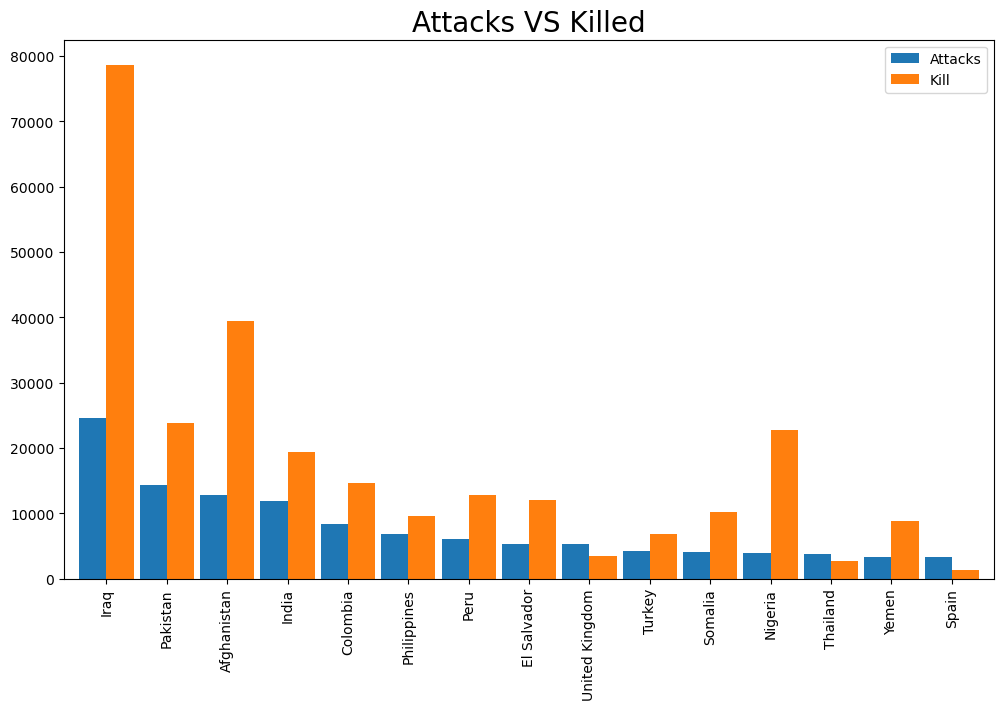

In [67]:
count_terror = df['Country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=df.groupby ('Country')['Kill'].sum().to_frame()
count_terror.merge(count_kill,left_index = True,right_index =True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.title("Attacks VS Killed", fontsize=20)
fig.set_size_inches(12,7)
plt.show()


In [70]:
d=df[['Gang_name','Country','Kill']]
d=d.groupby(['Gang_name','Country'],axis=0).sum().sort_values('Kill',ascending=False).drop('Unknown').reset_index().head(10)
df

C:\Users\Nikki\AppData\Local\Temp\ipykernel_11244\284742214.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  d=d.groupby(['Gang_name','Country'],axis=0).sum().sort_values('Kill',ascending=False).drop('Unknown').reset_index().head(10)


,Year,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,Kill,Wound
0,1970,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,1.0,0.0
1,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0.0,0.0
2,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,1.0,0.0
3,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,0.0,0.0
4,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Al-Shabaab,Firearms,1.0,2.0
181687,2017,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Muslim extremists,Explosives,2.0,7.0
181688,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0
181689,2017,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Unknown,Explosives,0.0,0.0


### Gropus of Terror

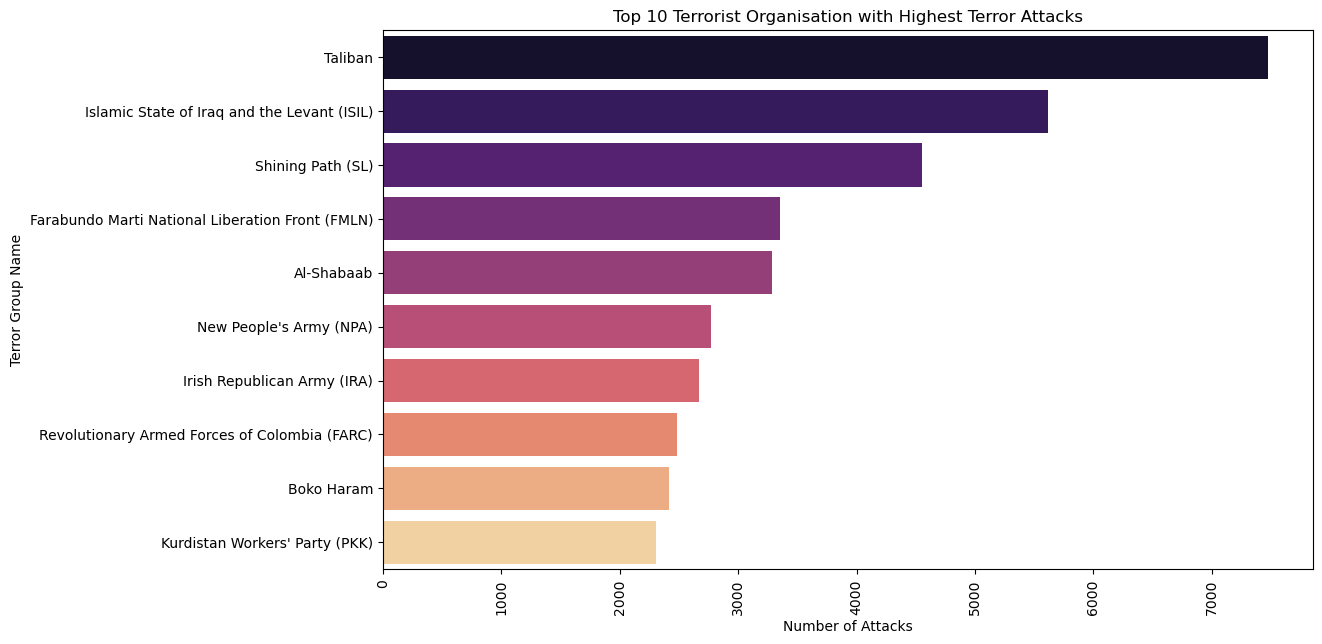

In [74]:
plt.figure(figsize = (12,7))
sns.barplot(x = df['Gang_name'].value_counts()[1:11].values, y = df['Gang_name'].value_counts()[1:11].index,palette='magma')
plt.title('Top 10 Terrorist Organisation with Highest Terror Attacks')
plt.ylabel('Terror Group Name')
plt.xlabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

### Conclusion and Results :

- Country with the most attacks: Iraq
- City with the most attacks: Baghdad
- R egion with the most attacks:Middle East & North Africa
- Year with the most attacks: 2014
- Month with the most attacks: 5
- Group with the most attacks: Taliban
- Most Attack Types: Bombing/Explosion

Results of Analysis
Most of the attacks were attacked through explosives and then through firearms.
Attacks were more during 2014 and then in 2015. When compared to attacks from 1970 onwards, the last 6 years scored a maximum. But from 2014 onwards count started decreasing.
Almost Every day has the same contribution but attacks were low during 31st and high during 15th and 1st.
Iraq dominates all the countries and it has the highest number of attacks and then Pakistan, Afghanistan, and India follow it.
The Middle East& North Africa leads 1st among all the regions and then South Asia takes 2nd place.
For most of the attacks, the target is Private Citizens& property and the next Military leads.
Most of the attacks were through either Bombing or Explosion.

Measures to be Taken to Reduce Terrorism:
- By reducing access to dangerous weapons
- Government should provide more security over countries
- Security should be strengthened across borders
- Government should take measures on increased immigration


The goal of this project was to build a tool which helps users to understand and
interpret the nature of terrorism. User can precevie  dataset through visual design. A visualization which can be used to calculate the total number of attacks, total
kill counts and location based on the selected region and year provides interactive interface
to explore this dataset. . Users can understand various patterns, trends and correlation in
terrorism through visual interpretation and its provided explanation.

### Reference: 


- https://www.google.com/
- https://scholarworks.calstate.edu/downloads/dj52w931n
- https://bit.ly/3F8CV9A